In [23]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linspace

Text(0, 0.5, 'altura')

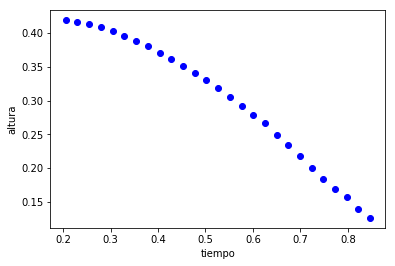

In [94]:
outDisdat = open("../data/falling.txt") # abre el archivo de la carpeta data
t = []
y = []
# asigna los valores de las dos columnas outDisdat en dos variables
# tiempo t y  altura Y
for i in outDisdat:
    column = i.split()
    if column[0] != "//Falling" and column[0] != "//Time":
        t.append(float(column[0]))
        y.append(float(column[1]))
#convierte lista a arreglo
y = np.array(y)
t = np.array(t)
plt.plot(t,y,'bo',label = 'caida libre')
plt.xlabel('tiempo')
plt.ylabel('altura')

In [95]:
# velocidad
# calculo de la velocidad utlizando diferencias finitas de primer orden centradas
Dt = round((max(t)-min(t))/len(y),4)
ypos = np.array(y)
v = np.zeros(len(y))
a = np.zeros(len(y))
for i in range(1,len(y)-1):
    v[i] = (ypos[i+1]-ypos[i-1])/(2*Dt) # velocidad
    a[i] = (ypos[i+1]-2*ypos[i]+ypos[i-1])/(round(Dt**2,4)) # aceleracion

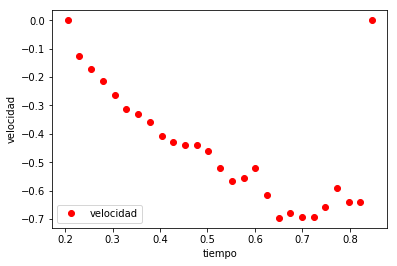

In [98]:
#comportamiento de la velocidad
plt.plot(t,v,'or',label = 'velocidad')
plt.xlabel('tiempo')
plt.ylabel('velocidad')
plt.legend()

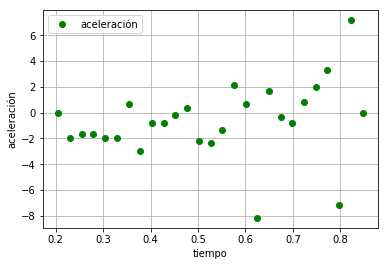

In [99]:
#comportamiento de la aceleración
plt.plot(t,a,'og', label = 'aceleración')
plt.xlabel('tiempo')
plt.ylabel('aceleración')
plt.grid("on")
plt.legend()

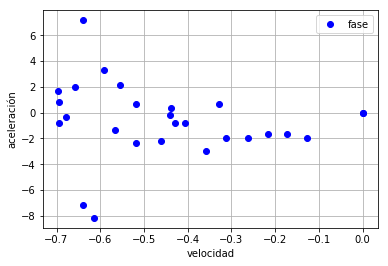

In [100]:
# comportamiento de la aceleracion vs velocidad
plt.plot(v,a,'bo',label = 'fase')
plt.xlabel('velocidad')
plt.ylabel('aceleración')
plt.grid("on")
plt.legend()

In [29]:
# guarda los datos de acelracion en el archivo datafile_acel.dat
# para interpolar los datos
outDisdat = open("../data/datafile_acel.dat","w")
for i in range(len(a)):
    outDisdat.write('%0.4f  %0.4f\n' % (t[i] ,a[i]))
outDisdat.close()

In [101]:
# interpolacion por minimos cuadrados
def minimos(D):
    sigma = (abs(D[:,1]))**0.5
    d = 0.
    dx = 0.
    dxx = 0.
    dxy = 0.
    dy =0.
    delta = 0.
    for i in range(len(D[:,0])):
        d += 1/sigma[i]**2
        dx += D[i,0]/sigma[i]**2
        dxx += (D[i,0]/sigma[i])**2
        dxy += D[i,0]*D[i,1]/sigma[i]**2
        dy += D[i,1]/sigma[i]**2

    delta = d*dxx - dx**2

    a1 = (dxx*dy - dx*dxy)/delta
    a2 = (d*dxy -dx*dy)/delta
    return([a1,a2,sigma])

In [102]:
# abre los datos para interpolar
Dat = np.loadtxt("../data/datafile_acel.dat")
D = np.copy(Dat)
dat = []
# elimina los ceros(imagen) del archivo
for i in D:
    if i[1] != 0:
        dat.append(i)

dat = np.array(dat)
[a1,a2,sigma] = minimos(dat)
x = linspace(min(dat[:,0]),max(dat[:,0]),100)
g = a1 +a2*x # ecuacion de la recta encontrada
# a1 intercepto a2 pendiente
print('ecuación de la recta: %0.4f(x) + (%0.4f)' % (a2,a1))

ecuación de la recta: 3.5886(x) + (-2.0900)


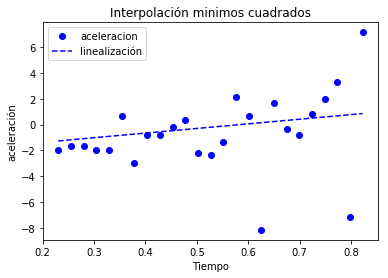

In [103]:
# comportamiento de la recta interpolada frente a los datos
plt.plot(dat[:,0],dat[:,1],'bo',label = 'aceleracion')
plt.plot(x,g,'b--',label = 'linealización')
plt.title('Interpolación minimos cuadrados')
plt.ylabel('aceleración')
plt.xlabel('Tiempo')
plt.legend()

In [104]:
def normal(g,vt,Vo,Yo,tmin,tmax,Deltat,fun):
    N = (tmax - tmin)/Deltat
    t = linspace(tmin,tmax,int(N))
    v = np.zeros(len(t))
    y = np.zeros(len(t))
    y[0] = Yo
    v[0] = Vo
    for i in range(len(t)-1):
        V = v[i]
        acel = float(eval(fun))
        v[i+1] = v[i] + Deltat*acel
        y[i+1] = y[i] + Deltat*v[i]
    return(t,y,v)

In [105]:
def mejorado(g,vt,Vo,Yo,tmin,tmax,Deltat,fun):
    N = (tmax - tmin)/Deltat
    t = linspace(tmin,tmax,int(N))
    v = np.zeros(len(t))
    y = np.zeros(len(t))
    u = np.zeros(len(t))
    u[0] = Vo
    y[0] = Yo
    v[0] = Vo
    for i in range(len(t)-1):
        V = v[i]
        acel1 = float(eval(fun))
        v[i+1] = v[i] + Deltat*acel1
        u[i+1] = v[i] + Deltat*acel1
        y[i+1] = y[i] + Deltat*(0.5)*(v[i]+u[i+1])
    return(t,y,v)

In [135]:
#fuerza neta de un objeto cayendo
#modelo cuadratico
#(1/m)(d2y/dt2) = -g(1-v2/vt2)
g = 9.8
# velocidad terminal del objeto
vt = v[len(v)-2]
# v = dy/dt
# dv/dt = -mg(1-v2/vt2)
fun = '-g*(1-(V/vt)**2)'
# condiciones iniciales
Vo = 0
Yo = y[0]
# intervalo de tiempo
tmin = min(t)
tmax = max(t)
Deltat = Dt


In [136]:
# se obtiene los datos de la veloicidad del modelo cuadatico de caida de un objeto
(t,yp,vp)=normal(g,vt,Vo,Yo,tmin,tmax,Deltat,fun)
# solucion analitica de la ecuacion (modelo)

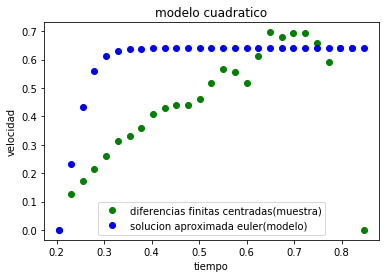

In [137]:
# comportamiento de la solucion aproximada respecto a la analitica, ademas 
# del comportamiento de la velocidad utilizando diferrencias finitas para la muestra
plt.plot(t,-v,'og',label = 'diferencias finitas centradas(muestra)')
plt.plot(t,-vp,'ob',label = 'solucion aproximada euler(modelo)')
plt.ylabel('velocidad')
plt.xlabel('tiempo')
plt.title('modelo cuadratico')
plt.legend()

In [138]:
#fuerza neta de un objeto cayendo
#modelo lineal
#(1/m)(d2y/dt2) = -g(1-v/vt)
g = 9.8
# velocidad terminal del objeto
vt = v[len(v)-2]
# v = dy/dt
# dv/dt = -mg(1-v2/vt2)
fun = '-g*(1-(V/vt))'
# condiciones iniciales
Vo = 0
Yo = y[0]
# intervalo de tiempo
tmin = min(t)
tmax = max(t)
Deltat = Dt

In [139]:
# se obtiene los datos de la veloicidad del modelo lineal de caida de un objeto
(t,yp,vp)=normal(g,vt,Vo,Yo,tmin,tmax,Deltat,fun)
# solucion analitica de la ecuacion (modelo)
vpa = ((-vt)- np.exp(-(g/(-vt))*t))

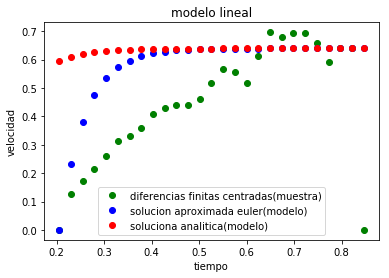

In [140]:
# comportamiento de la solucion aproximada respecto a la analitica, ademas 
# del comportamiento de la velocidad utilizando diferrencias finitas para la muestra
plt.plot(t,-v,'og',label = 'diferencias finitas centradas(muestra)')
plt.plot(t,-vp,'ob',label = 'solucion aproximada euler(modelo)')
plt.plot(t,vpa,'or',label = 'soluciona analitica(modelo)')
plt.ylabel('velocidad')
plt.xlabel('tiempo')
plt.title('modelo lineal')
plt.legend()

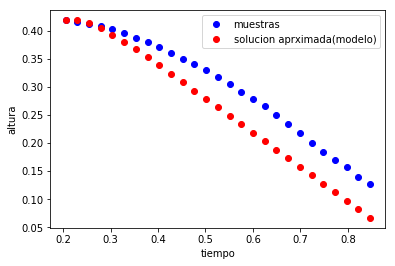

In [141]:
# comportamiento de la altura de la muestra repecto a la solucion
# obtenida con euler para la velocidad terminal(ultimo valor(no cero))
plt.plot(t,y,'ob',label = 'muestras')
plt.plot(t,yp,'or',label = 'solucion aprximada(modelo)')
plt.ylabel('altura')
plt.xlabel('tiempo')
plt.legend()